In [22]:
import os
import glob
import mne
import numpy as np
import pandas as pd
from joblib import Parallel, delayed
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re

In [3]:
EEG_MARKERS_DIR = "/neurospin/lbi/monkeyfmri/deepstim/database/DBS_database/derivatives/eeg_markers"

In [3]:
cd /neurospin/lbi/monkeyfmri/deepstim/database/DBS_database/derivatives/eeg_markers

/neurospin/lbi/monkeyfmri/deepstim/database/DBS_database/derivatives/eeg_markers


In [4]:
ls

KolmogorovComplexity-default.png*
PermutationEntropy-default.png*
PowerSpectralDensity-alphan.png*
PowerSpectralDensity-alpha.png*
PowerSpectralDensity-betan.png*
PowerSpectralDensity-beta.png*
PowerSpectralDensity-deltan.png*
PowerSpectralDensity-delta.png*
PowerSpectralDensity-gamman.png*
PowerSpectralDensity-gamma.png*
PowerSpectralDensity-summary_se.png*
PowerSpectralDensitySummary-summary_msf.png*
PowerSpectralDensitySummary-summary_sef90.png*
PowerSpectralDensitySummary-summary_sef95.png*
PowerSpectralDensity-thetan.png*
PowerSpectralDensity-theta.png*
sub-Nori_ses-20170310_cond-anest_run-1_makers.tsv*
sub-Nori_ses-20170310_cond-anest_run-2_makers.tsv*
sub-Nori_ses-20170310_cond-anest_run-3_makers.tsv*
sub-Nori_ses-20170310_cond-anest_run-4_makers.tsv*
sub-Nori_ses-20170310_cond-cm3v_run-1_makers.tsv*
sub-Nori_ses-20170310_cond-cm3v_run-2_makers.tsv*
sub-Nori_ses-20170310_cond-cm3v_run-3_makers.tsv*
sub-Nori_ses-20170310_cond-cm3v_run-4_makers.tsv*
sub-Nori_ses-20170310_cond-cm3v

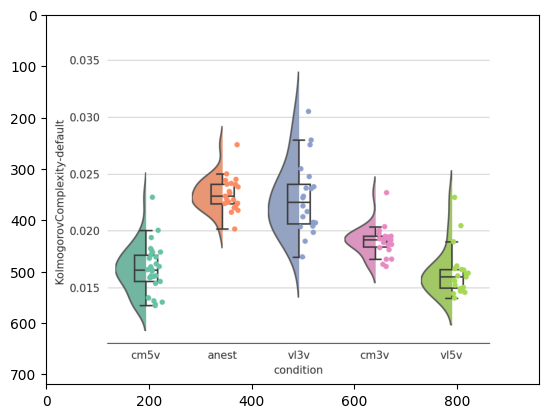

In [20]:
img = mpimg.imread('KolmogorovComplexity-default.png')
imgplot = plt.imshow(img)
plt.show()

In [14]:
markers = ['PowerSpectralDensity-delta', 'PowerSpectralDensity-deltan',
       'PowerSpectralDensity-theta', 'PowerSpectralDensity-thetan',
       'PowerSpectralDensity-alpha', 'PowerSpectralDensity-alphan',
       'PowerSpectralDensity-beta', 'PowerSpectralDensity-betan',
       'PowerSpectralDensity-gamma', 'PowerSpectralDensity-gamman',
       'PowerSpectralDensity-summary_se',
       'PowerSpectralDensitySummary-summary_msf',
       'PowerSpectralDensitySummary-summary_sef90',
       'PowerSpectralDensitySummary-summary_sef95',
       'PermutationEntropy-default', 'SymbolicMutualInformation-weighted',
       'KolmogorovComplexity-default']

In [15]:
df_mean_markers = pd.DataFrame(columns = ["cond","monkey"]+markers)

In [48]:
df_mean_markers

,cond,monkey,PowerSpectralDensity-delta,PowerSpectralDensity-deltan,PowerSpectralDensity-theta,PowerSpectralDensity-thetan,PowerSpectralDensity-alpha,PowerSpectralDensity-alphan,PowerSpectralDensity-beta,PowerSpectralDensity-betan,PowerSpectralDensity-gamma,PowerSpectralDensity-gamman,PowerSpectralDensity-summary_se,PowerSpectralDensitySummary-summary_msf,PowerSpectralDensitySummary-summary_sef90,PowerSpectralDensitySummary-summary_sef95,PermutationEntropy-default,SymbolicMutualInformation-weighted,KolmogorovComplexity-default
0,cm3v,Taro,3.351780812914876,0.17273819780177224,2.959465861934357,0.06800148066374623,3.426315140594914,0.06087643189705932,3.2050524844049635,0.14173423594092918,3.0346397434280785,0.0008345472471126571,2.3358030084512107,3.6905901707332642,2.8001996448849145,2.105754447235569,0.04882375886007785,0.010425352920029713,0.01947303288076839


In [49]:
index = 0
for file in os.listdir("/neurospin/lbi/monkeyfmri/deepstim/database/DBS_database/derivatives/eeg_markers"):
    if "tsv" in file:
        l = re.split("-|_",file)
        cond = l[5]
        monkey = l[1]
        df = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/database/DBS_database/derivatives/eeg_markers"+"/"+file,sep = '\t')
        mean_markers = np.concatenate([[cond],[monkey],list(df.mean())])
        df_mean_markers.loc[index] = mean_markers
        index += 1

In [51]:
df_mean_markers.to_csv("/neurospin/lbi/monkeyfmri/deepstim/workspace/2023_ASM_tembedding/gitproject/2023_asm_tembedding/data/EEG/mean_markers.tsv",sep = "\t")